In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.optimize import curve_fit

In [8]:
plt.rcParams["figure.figsize"] =(10,5)
plt.rcParams['figure.dpi'] = 150

## B-I

In [3]:
bi = pd.DataFrame(columns=['B (Gauss)', 'I (A)'])
bi['B (Gauss)'] = [650, 1640, 2320, 3050, 3820, 4620, 5370, 6090, 6780, 7480, 8020, 8680, 9150, 9660]
bi['I (A)'] = [0.00, 0.30, 0.60, 0.90, 1.20, 1.50, 1.80, 2.10, 2.40, 2.70, 3.00, 3.30, 3.60, 3.90]

In [4]:
bi

,B (Gauss),I (A)
0,650,0.0
1,1640,0.3
2,2320,0.6
3,3050,0.9
4,3820,1.2
5,4620,1.5
6,5370,1.8
7,6090,2.1
8,6780,2.4
9,7480,2.7


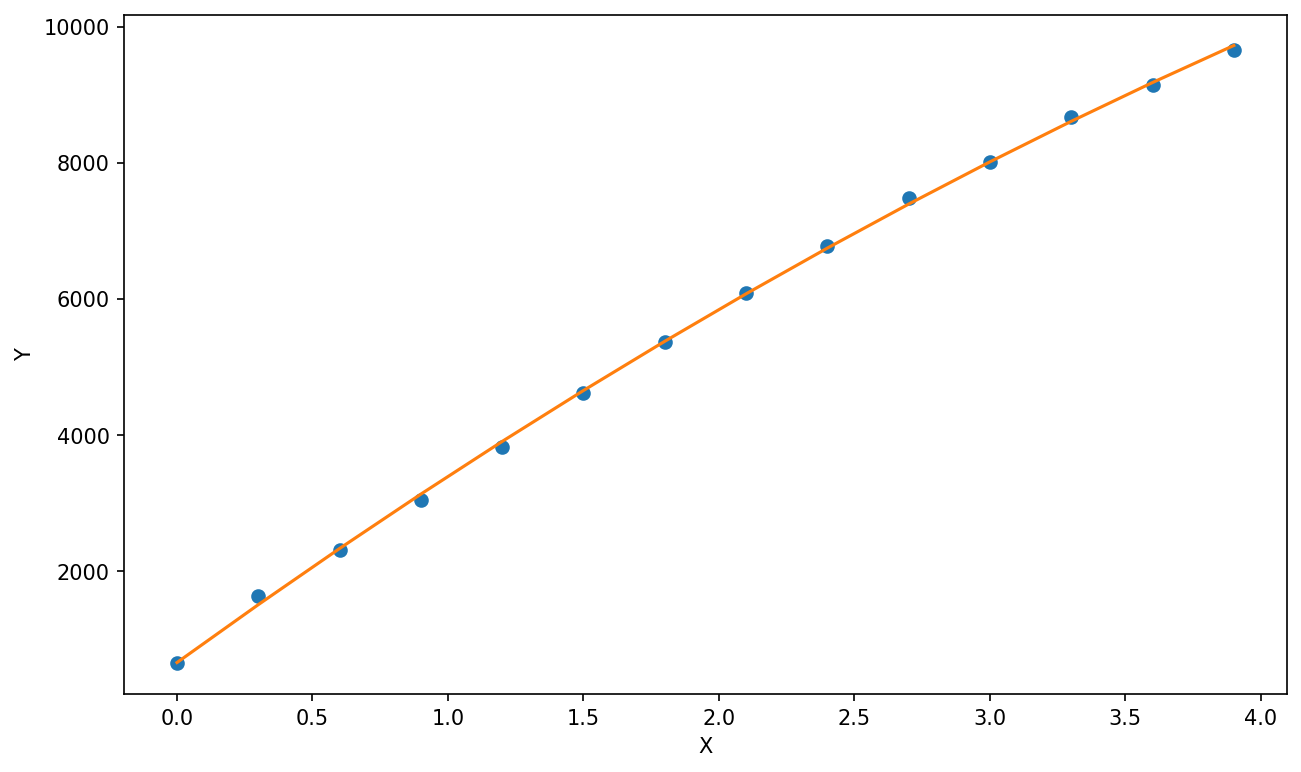

In [5]:
from maths.algebra import CurveFitting

cf = CurveFitting(bi['I (A)'], bi['B (Gauss)'] , 2)
beta,error = cf.fit(error_=True)

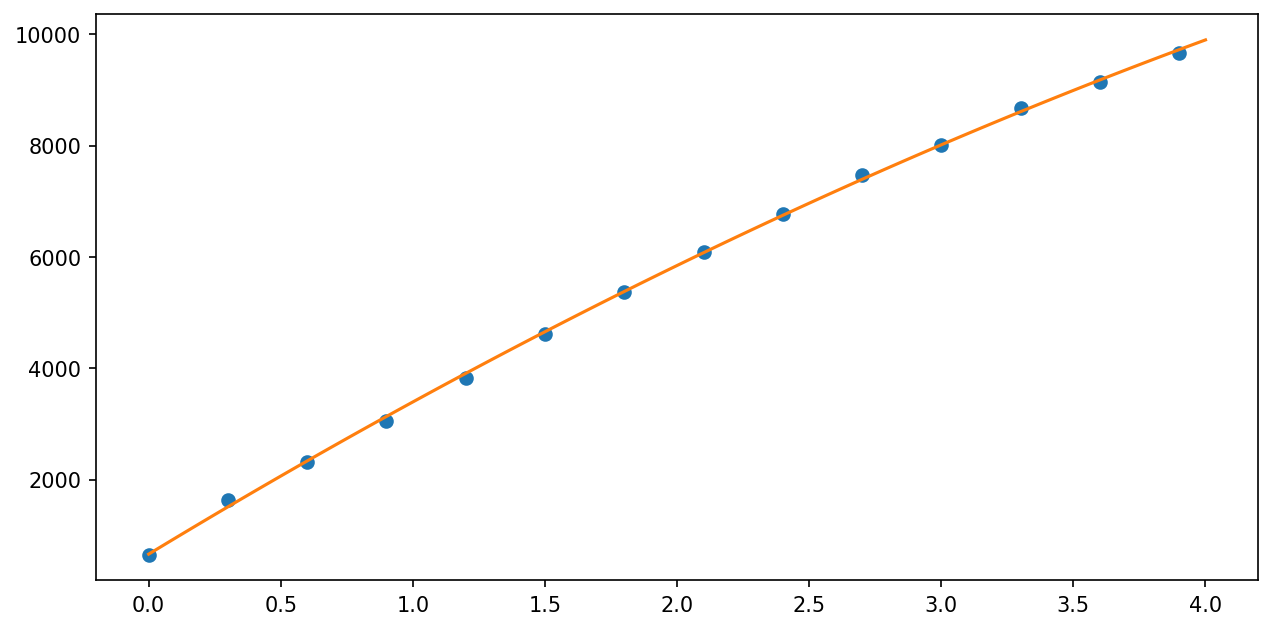

In [9]:
x = np.linspace(0, 4, 100)

f = lambda x: beta[0] + beta[1]*x + beta[2]*x**2

plt.plot(bi['I (A)'], bi['B (Gauss)'], 'o', label='Data')
plt.plot(x, f(x), label='Fit');

In [22]:
def linear(x,m,c):
    return m*x + c

pcoe, pcov = curve_fit(linear, bi['I (A)'] ,bi['B (Gauss)'],p0=[5466,650] )

In [23]:
print('Std. Deviation of the coefficients: '+str(np.sqrt(np.diag(pcov))))
print('Coefficients: '+str(pcoe))

Std. Deviation of the coefficients: [ 46.22760909 106.07196547]
Coefficients: [2324.32233961  991.14287023]


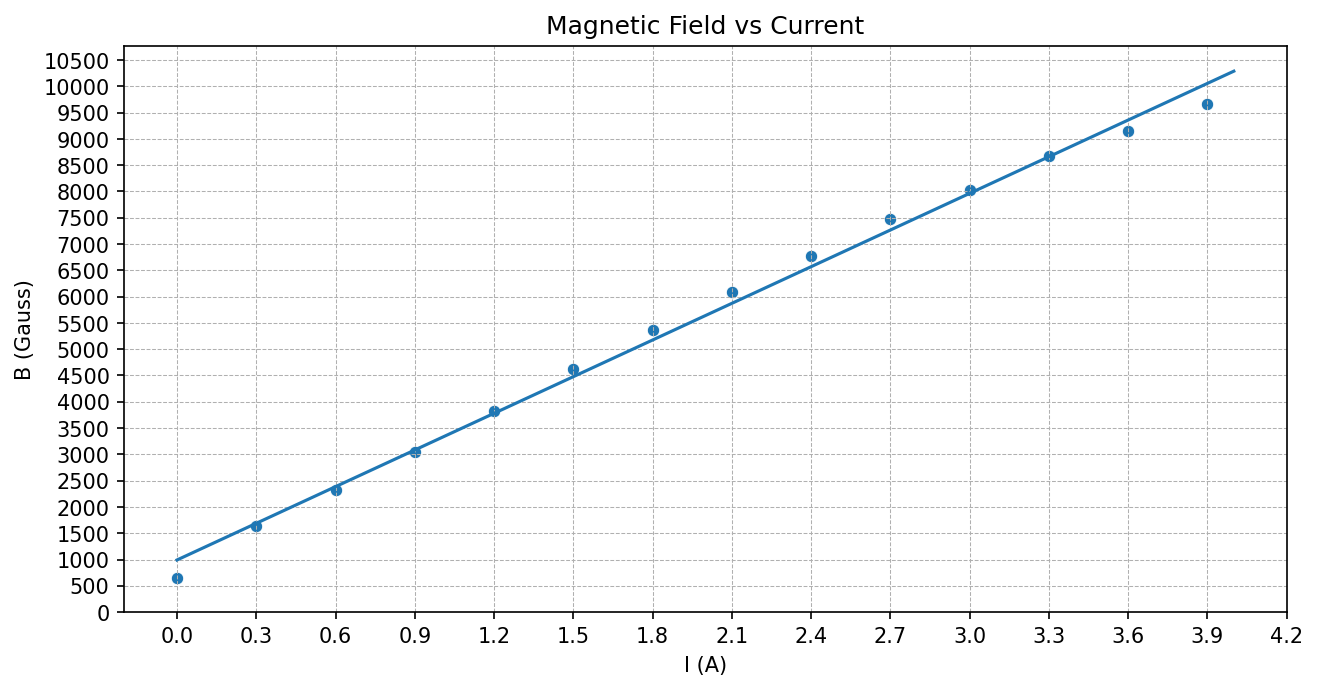

In [24]:
sns.scatterplot(y = 'B (Gauss)',x = 'I (A)',data = bi)
x = np.linspace(0,4,200)
y = linear(x,*pcoe)
plt.plot(x,y)
plt.xticks(np.arange(0, 4.2, 0.3));
plt.yticks(np.arange(0, 11000,500));
plt.grid(linestyle = '--', linewidth = 0.5)
plt.title('Magnetic Field vs Current');

***

In [25]:
D = 0.065 # 65mm
l = 546.1 * (10**(-9)) # Wavelength | 546.1 nm

# Without Splitting

In [107]:
readings = pd.DataFrame()

readings['Ring'] = [1,2,3]
#readings['Inner Radius Diameter (Pixel) '] = [ 164, 400, 540 ]
#readings['Outer Radius Diameter (Pixel) '] = [ 263, 451, 580 ]
#readings['Radius (Pixel) '] = (( readings['Inner Radius Diameter (Pixel) '] + readings['Outer Radius Diameter (Pixel) '])/2 )/2
readings['Radius (Pixel) '] = [134, 323, 456]
readings['Radius (Pixel) '] = readings['Radius (Pixel) ']/2
readings['Radius (micro meter)'] = readings['Radius (Pixel) ']*2.8 
readings['Radius^2 (micrometer^2)'] = readings['Radius (micro meter)']**2
readings['Radius^2 (micrometer^2)'] = readings['Radius^2 (micrometer^2)'] - readings['Radius^2 (micrometer^2)'][0]
readings['Thickness t (mm)'] = [np.nan, (10**(3))*((1*(D**2)*l))/(readings['Radius^2 (micrometer^2)'][1]*(10**(-12))),  (10**(3))*((2*(D**2)*l))/(readings['Radius^2 (micrometer^2)'][2]*(10**(-12))) ]
readings['Thickness t (mm)'] = round(readings['Thickness t (mm)'],2)
readings

,Ring,Radius (Pixel),Radius (micro meter),Radius^2 (micrometer^2),Thickness t (mm)
0,1,67.0,187.6,0.00,NaN
1,2,161.5,452.2,169291.08,13.63
2,3,228.0,638.4,372360.80,12.39


In [109]:
t = readings['Thickness t (mm)'].mean()
print("Average Thickness = ", round(t,2), 'mm' )

t = readings['Thickness t (mm)'].mean()/1000
print("Average Thickness = ", round(t,4), 'm' )

Average Thickness =  13.01 mm
Average Thickness =  0.013 m


# With Splitting | I = 3A 

In [110]:
I = 3 # Ampere
B = linear(I,*pcoe)/10000
#B = fitted_polynomial(1.74)/10000
print("Magnetic Field = ", round(B,2), 'Tesla' )

Magnetic Field =  0.8 Tesla


In [96]:
readings = pd.DataFrame()
readings['Ring'] = ['1 a' ,'1 b','1 c','2 a','2 b','2 c','3 a','3 b','3 c']

readings['Radius (Pixel) '] = [134, 323, 456, 554, 640, 714, 770, 828, 887]
readings['Radius (Pixel) '] = readings['Radius (Pixel) '] -5
readings['Radius (micro meter)'] = readings['Radius (Pixel) ']*2.8
readings['Radius^2 (micrometer^2)'] = readings['Radius (micro meter)']**2
readings

,Ring,Radius (Pixel),Radius (micro meter),Radius^2 (micrometer^2)
0,1 a,129,361.2,130465.44
1,1 b,318,890.4,792812.16
2,1 c,451,1262.8,1594663.84
3,2 a,549,1537.2,2362983.84
4,2 b,635,1778.0,3161284.00
5,2 c,709,1985.2,3941019.04
6,3 a,765,2142.0,4588164.00
7,3 b,823,2304.4,5310259.36
8,3 c,882,2469.6,6098924.16


In [97]:
read = pd.DataFrame(columns=['Rings','a','δab','b','δbc','c'])
read['Rings'] = [ '1', 'δ12', '2', 'δ23', '3' ]
read['a'] = [ readings[readings['Ring']=='1 a']['Radius^2 (micrometer^2)'].values[0],
                  readings[readings['Ring']=='2 a']['Radius^2 (micrometer^2)'].values[0] - readings[readings['Ring']=='1 a']['Radius^2 (micrometer^2)'].values[0],
                 readings[readings['Ring']=='2 a']['Radius^2 (micrometer^2)'].values[0] ,
                 readings[readings['Ring']=='3 a']['Radius^2 (micrometer^2)'].values[0] - readings[readings['Ring']=='2 a']['Radius^2 (micrometer^2)'].values[0],
                 readings[readings['Ring']=='3 a']['Radius^2 (micrometer^2)'].values[0]   
             ]

read['b'] = [ readings[readings['Ring']=='1 b']['Radius^2 (micrometer^2)'].values[0],
                  readings[readings['Ring']=='2 b']['Radius^2 (micrometer^2)'].values[0] - readings[readings['Ring']=='1 b']['Radius^2 (micrometer^2)'].values[0],
                 readings[readings['Ring']=='2 b']['Radius^2 (micrometer^2)'].values[0] ,
                 readings[readings['Ring']=='3 b']['Radius^2 (micrometer^2)'].values[0] - readings[readings['Ring']=='2 b']['Radius^2 (micrometer^2)'].values[0],
                 readings[readings['Ring']=='3 b']['Radius^2 (micrometer^2)'].values[0]   
             ]

read['c'] = [ readings[readings['Ring']=='1 c']['Radius^2 (micrometer^2)'].values[0],
                  readings[readings['Ring']=='2 c']['Radius^2 (micrometer^2)'].values[0] - readings[readings['Ring']=='1 c']['Radius^2 (micrometer^2)'].values[0],
                 readings[readings['Ring']=='2 c']['Radius^2 (micrometer^2)'].values[0] ,
                 readings[readings['Ring']=='3 c']['Radius^2 (micrometer^2)'].values[0] - readings[readings['Ring']=='2 c']['Radius^2 (micrometer^2)'].values[0],
                 readings[readings['Ring']=='3 c']['Radius^2 (micrometer^2)'].values[0]   
             ]

read.loc[0,'δab'] = read.loc[0,'b'] - read.loc[0,'a']
read.loc[0,'δbc'] = read.loc[0,'c'] - read.loc[0,'b']

read.loc[2,'δab'] = read.loc[2,'b'] - read.loc[2,'a']
read.loc[2,'δbc'] = read.loc[2,'c'] - read.loc[2,'b']

read.loc[4,'δab'] = read.loc[4,'b'] - read.loc[4,'a']
read.loc[4,'δbc'] = read.loc[4,'c'] - read.loc[4,'b']

read


,Rings,a,δab,b,δbc,c
0,1,130465.44,662346.72,792812.16,801851.68,1594663.84
1,δ12,2232518.40,NaN,2368471.84,NaN,2346355.20
2,2,2362983.84,798300.16,3161284.00,779735.04,3941019.04
3,δ23,2225180.16,NaN,2148975.36,NaN,2157905.12
4,3,4588164.00,722095.36,5310259.36,788664.8,6098924.16


In [98]:
print("Average δab = ", read['δab'].mean(), 'micrometer^2' )
print("Average δbc = ", read['δbc'].mean(), 'micrometer^2' )
print('------------------------------')
print("Average δab = ", read['δab'].mean()*(10**(-12)) , 'meter^2' )
print("Average δbc = ", read['δbc'].mean()*(10**(-12)), 'meter^2' )
print('------------------------------')
print('------------------------------')
temp_12_0 = ( read[ read['Rings']=='δ12' ]['a'].values[0] + read[ read['Rings']=='δ12' ]['b'].values[0] + read[ read['Rings']=='δ12' ]['c'].values[0] )/3
print("Average δ12 = ", temp_12_0 , 'micrometer^2' )
temp_23_0 = ( read[ read['Rings']=='δ23' ]['a'].values[0] + read[ read['Rings']=='δ23' ]['b'].values[0] + read[ read['Rings']=='δ23' ]['c'].values[0] )/3
print("Average δ23 = ", temp_23_0 , 'micrometer^2' )
print('------------------------------')
temp_12 = (10**(-12))*( read[ read['Rings']=='δ12' ]['a'].values[0] + read[ read['Rings']=='δ12' ]['b'].values[0] + read[ read['Rings']=='δ12' ]['c'].values[0] )/3
print("Average δ12 = ", temp_12 ,'meter^2' )
temp_23 = (10**(-12))*( read[ read['Rings']=='δ23' ]['a'].values[0] + read[ read['Rings']=='δ23' ]['b'].values[0] + read[ read['Rings']=='δ23' ]['c'].values[0] )/3
print("Average δ23 = ", temp_23 , 'meter^2' )
print('------------------------------')
print('------------------------------')
temp_delta = (temp_12 + temp_23)/2 
print("Average Δ = ", temp_delta ,  'meter^2' )
delta_Vab = read['δab'].mean()*(10**(-12))/(2*t*temp_delta)
print("Average Vab = ", delta_Vab ,  'meter^2' )
delta_Vbc = read['δbc'].mean()*(10**(-12))/(2*t*temp_delta)
print("Average Vbc = ", delta_Vbc ,  'meter^2' )
print('------------------------------')
print('------------------------------')
print("u0/hc" , (delta_Vab+delta_Vbc)/B )

Average δab =  727580.7466666665 micrometer^2
Average δbc =  790083.8399999999 micrometer^2
------------------------------
Average δab =  7.275807466666665e-07 meter^2
Average δbc =  7.900838399999998e-07 meter^2
------------------------------
------------------------------
Average δ12 =  2315781.813333333 micrometer^2
Average δ23 =  2177353.5466666664 micrometer^2
------------------------------
Average δ12 =  2.3157818133333328e-06 meter^2
Average δ23 =  2.1773535466666665e-06 meter^2
------------------------------
------------------------------
Average Δ =  2.2465676799999995e-06 meter^2
Average Vab =  12.44589331563941 meter^2
Average Vbc =  13.515062387372021 meter^2
------------------------------
------------------------------
u0/hc 32.59743532505059


# With Splitting | I = 2A 

In [54]:
readings = pd.DataFrame()

readings['Ring'] = ['1 a' ,'1 b','1 c','2 a','2 b','2 c','3 a','3 b','3 c']

readings['Radius (Pixel) '] = [120, 184, 265, 316, 362, 411, 452, 483, 513]
readings['Radius (micro meter)'] = readings['Radius (Pixel) ']*2.8 
readings['Radius^2 (micrometer^2)'] = readings['Radius (micro meter)']**2
readings

,Ring,Radius (Pixel),Radius (micro meter),Radius^2 (micrometer^2)
0,1 a,120,336.0,112896.00
1,1 b,184,515.2,265431.04
2,1 c,265,742.0,550564.00
3,2 a,316,884.8,782871.04
4,2 b,362,1013.6,1027384.96
5,2 c,411,1150.8,1324340.64
6,3 a,452,1265.6,1601743.36
7,3 b,483,1352.4,1828985.76
8,3 c,513,1436.4,2063244.96


In [55]:
I = 2 # Ampere
B = linear(I,*pcoe)/10000
print("Magnetic Field = ", B, 'Tesla' )

Magnetic Field =  0.5639787549448814 Tesla


In [56]:
read = pd.DataFrame(columns=['Rings','a','δab','b','δbc','c'])
read['Rings'] = [ '1', 'δ12', '2', 'δ23', '3' ]
read['a'] = [ readings[readings['Ring']=='1 a']['Radius^2 (micrometer^2)'].values[0],
                  readings[readings['Ring']=='2 a']['Radius^2 (micrometer^2)'].values[0] - readings[readings['Ring']=='1 a']['Radius^2 (micrometer^2)'].values[0],
                 readings[readings['Ring']=='2 a']['Radius^2 (micrometer^2)'].values[0] ,
                 readings[readings['Ring']=='3 a']['Radius^2 (micrometer^2)'].values[0] - readings[readings['Ring']=='2 a']['Radius^2 (micrometer^2)'].values[0],
                 readings[readings['Ring']=='3 a']['Radius^2 (micrometer^2)'].values[0]   
             ]

read['b'] = [ readings[readings['Ring']=='1 b']['Radius^2 (micrometer^2)'].values[0],
                  readings[readings['Ring']=='2 b']['Radius^2 (micrometer^2)'].values[0] - readings[readings['Ring']=='1 b']['Radius^2 (micrometer^2)'].values[0],
                 readings[readings['Ring']=='2 b']['Radius^2 (micrometer^2)'].values[0] ,
                 readings[readings['Ring']=='3 b']['Radius^2 (micrometer^2)'].values[0] - readings[readings['Ring']=='2 b']['Radius^2 (micrometer^2)'].values[0],
                 readings[readings['Ring']=='3 b']['Radius^2 (micrometer^2)'].values[0]   
             ]

read['c'] = [ readings[readings['Ring']=='1 c']['Radius^2 (micrometer^2)'].values[0],
                  readings[readings['Ring']=='2 c']['Radius^2 (micrometer^2)'].values[0] - readings[readings['Ring']=='1 c']['Radius^2 (micrometer^2)'].values[0],
                 readings[readings['Ring']=='2 c']['Radius^2 (micrometer^2)'].values[0] ,
                 readings[readings['Ring']=='3 c']['Radius^2 (micrometer^2)'].values[0] - readings[readings['Ring']=='2 c']['Radius^2 (micrometer^2)'].values[0],
                 readings[readings['Ring']=='3 c']['Radius^2 (micrometer^2)'].values[0]   
             ]

read.loc[0,'δab'] = read.loc[0,'b'] - read.loc[0,'a']
read.loc[0,'δbc'] = read.loc[0,'c'] - read.loc[0,'b']

read.loc[2,'δab'] = read.loc[2,'b'] - read.loc[2,'a']
read.loc[2,'δbc'] = read.loc[2,'c'] - read.loc[2,'b']

read.loc[4,'δab'] = read.loc[4,'b'] - read.loc[4,'a']
read.loc[4,'δbc'] = read.loc[4,'c'] - read.loc[4,'b']

read


,Rings,a,δab,b,δbc,c
0,1,112896.00,152535.04,265431.04,285132.96,550564.00
1,δ12,669975.04,NaN,761953.92,NaN,773776.64
2,2,782871.04,244513.92,1027384.96,296955.68,1324340.64
3,δ23,818872.32,NaN,801600.80,NaN,738904.32
4,3,1601743.36,227242.4,1828985.76,234259.2,2063244.96


In [57]:
print("Average δab = ", read['δab'].mean(), 'micrometer^2' )
print("Average δbc = ", read['δbc'].mean(), 'micrometer^2' )
print('------------------------------')
print("Average δab = ", read['δab'].mean()*(10**(-12)) , 'meter^2' )
print("Average δbc = ", read['δbc'].mean()*(10**(-12)), 'meter^2' )
print('------------------------------')
print('------------------------------')
temp_12_0 = ( read[ read['Rings']=='δ12' ]['a'].values[0] + read[ read['Rings']=='δ12' ]['b'].values[0] + read[ read['Rings']=='δ12' ]['c'].values[0] )/3
print("Average δ12 = ", temp_12_0 , 'micrometer^2' )
temp_23_0 = ( read[ read['Rings']=='δ23' ]['a'].values[0] + read[ read['Rings']=='δ23' ]['b'].values[0] + read[ read['Rings']=='δ23' ]['c'].values[0] )/3
print("Average δ23 = ", temp_23_0 , 'micrometer^2' )
print('------------------------------')
temp_12 = (10**(-12))*( read[ read['Rings']=='δ12' ]['a'].values[0] + read[ read['Rings']=='δ12' ]['b'].values[0] + read[ read['Rings']=='δ12' ]['c'].values[0] )/3
print("Average δ12 = ", temp_12 ,'meter^2' )
temp_23 = (10**(-12))*( read[ read['Rings']=='δ23' ]['a'].values[0] + read[ read['Rings']=='δ23' ]['b'].values[0] + read[ read['Rings']=='δ23' ]['c'].values[0] )/3
print("Average δ23 = ", temp_23 , 'meter^2' )
print('------------------------------')
print('------------------------------')
temp_delta = (temp_12 + temp_23)/2 
print("Average Δ = ", temp_delta ,  'meter^2' )
delta_Vab = read['δab'].mean()*(10**(-12))/(2*t*temp_delta)
print("Average Vab = ", delta_Vab ,  'meter^2' )
delta_Vbc = read['δbc'].mean()*(10**(-12))/(2*t*temp_delta)
print("Average Vbc = ", delta_Vbc ,  'meter^2' )
print('------------------------------')
print('------------------------------')
print("u0/hc" , (delta_Vab+delta_Vbc)/B ) # 

Average δab =  208097.11999999985 micrometer^2
Average δbc =  272115.9466666667 micrometer^2
------------------------------
Average δab =  2.0809711999999984e-07 meter^2
Average δbc =  2.721159466666667e-07 meter^2
------------------------------
------------------------------
Average δ12 =  735235.1999999998 micrometer^2
Average δ23 =  786459.1466666665 micrometer^2
------------------------------
Average δ12 =  7.352351999999999e-07 meter^2
Average δ23 =  7.864591466666664e-07 meter^2
------------------------------
------------------------------
Average Δ =  7.608471733333332e-07 meter^2
Average Vab =  10.510733403742387 meter^2
Average Vbc =  13.744246774392254 meter^2
------------------------------
------------------------------
u0/hc 43.00690401095893


# With Splitting | I = 3.76A 

In [99]:
readings = pd.DataFrame()
readings['Ring'] = ['1 a' ,'1 b','1 c','2 a','2 b','2 c','3 a','3 b','3 c']

readings['Radius (Pixel) '] = [136, 237, 323, 395, 452, 505, 569, 595, 636]
readings['Radius (micro meter)'] = readings['Radius (Pixel) ']*2.8 
readings['Radius^2 (micrometer^2)'] = readings['Radius (micro meter)']**2
readings

,Ring,Radius (Pixel),Radius (micro meter),Radius^2 (micrometer^2)
0,1 a,136,380.8,145008.64
1,1 b,237,663.6,440364.96
2,1 c,323,904.4,817939.36
3,2 a,395,1106.0,1223236.00
4,2 b,452,1265.6,1601743.36
5,2 c,505,1414.0,1999396.00
6,3 a,569,1593.2,2538286.24
7,3 b,595,1666.0,2775556.00
8,3 c,636,1780.8,3171248.64


In [100]:
I = 3.76 # Ampere
B = linear(I,*pcoe)/10000
print("Magnetic Field = ", B, 'Tesla' )

Magnetic Field =  0.9730594867158299 Tesla


In [101]:
read = pd.DataFrame(columns=['Rings','a','δab','b','δbc','c'])
read['Rings'] = [ '1', 'δ12', '2', 'δ23', '3' ]
read['a'] = [ readings[readings['Ring']=='1 a']['Radius^2 (micrometer^2)'].values[0],
                  readings[readings['Ring']=='2 a']['Radius^2 (micrometer^2)'].values[0] - readings[readings['Ring']=='1 a']['Radius^2 (micrometer^2)'].values[0],
                 readings[readings['Ring']=='2 a']['Radius^2 (micrometer^2)'].values[0] ,
                 readings[readings['Ring']=='3 a']['Radius^2 (micrometer^2)'].values[0] - readings[readings['Ring']=='2 a']['Radius^2 (micrometer^2)'].values[0],
                 readings[readings['Ring']=='3 a']['Radius^2 (micrometer^2)'].values[0]   
             ]

read['b'] = [ readings[readings['Ring']=='1 b']['Radius^2 (micrometer^2)'].values[0],
                  readings[readings['Ring']=='2 b']['Radius^2 (micrometer^2)'].values[0] - readings[readings['Ring']=='1 b']['Radius^2 (micrometer^2)'].values[0],
                 readings[readings['Ring']=='2 b']['Radius^2 (micrometer^2)'].values[0] ,
                 readings[readings['Ring']=='3 b']['Radius^2 (micrometer^2)'].values[0] - readings[readings['Ring']=='2 b']['Radius^2 (micrometer^2)'].values[0],
                 readings[readings['Ring']=='3 b']['Radius^2 (micrometer^2)'].values[0]   
             ]

read['c'] = [ readings[readings['Ring']=='1 c']['Radius^2 (micrometer^2)'].values[0],
                  readings[readings['Ring']=='2 c']['Radius^2 (micrometer^2)'].values[0] - readings[readings['Ring']=='1 c']['Radius^2 (micrometer^2)'].values[0],
                 readings[readings['Ring']=='2 c']['Radius^2 (micrometer^2)'].values[0] ,
                 readings[readings['Ring']=='3 c']['Radius^2 (micrometer^2)'].values[0] - readings[readings['Ring']=='2 c']['Radius^2 (micrometer^2)'].values[0],
                 readings[readings['Ring']=='3 c']['Radius^2 (micrometer^2)'].values[0]   
             ]

read.loc[0,'δab'] = read.loc[0,'b'] - read.loc[0,'a']
read.loc[0,'δbc'] = read.loc[0,'c'] - read.loc[0,'b']

read.loc[2,'δab'] = read.loc[2,'b'] - read.loc[2,'a']
read.loc[2,'δbc'] = read.loc[2,'c'] - read.loc[2,'b']

read.loc[4,'δab'] = read.loc[4,'b'] - read.loc[4,'a']
read.loc[4,'δbc'] = read.loc[4,'c'] - read.loc[4,'b']

read


,Rings,a,δab,b,δbc,c
0,1,145008.64,295356.32,440364.96,377574.4,817939.36
1,δ12,1078227.36,NaN,1161378.40,NaN,1181456.64
2,2,1223236.00,378507.36,1601743.36,397652.64,1999396.00
3,δ23,1315050.24,NaN,1173812.64,NaN,1171852.64
4,3,2538286.24,237269.76,2775556.00,395692.64,3171248.64


In [102]:
print("Average δab = ", read['δab'].mean(), 'micrometer^2' )
print("Average δbc = ", read['δbc'].mean(), 'micrometer^2' )
print('------------------------------')
print("Average δab = ", read['δab'].mean()*(10**(-12)) , 'meter^2' )
print("Average δbc = ", read['δbc'].mean()*(10**(-12)), 'meter^2' )
print('------------------------------')
print('------------------------------')
temp_12_0 = ( read[ read['Rings']=='δ12' ]['a'].values[0] + read[ read['Rings']=='δ12' ]['b'].values[0] + read[ read['Rings']=='δ12' ]['c'].values[0] )/3
print("Average δ12 = ", temp_12_0 , 'micrometer^2' )
temp_23_0 = ( read[ read['Rings']=='δ23' ]['a'].values[0] + read[ read['Rings']=='δ23' ]['b'].values[0] + read[ read['Rings']=='δ23' ]['c'].values[0] )/3
print("Average δ23 = ", temp_23_0 , 'micrometer^2' )
print('------------------------------')
temp_12 = (10**(-12))*( read[ read['Rings']=='δ12' ]['a'].values[0] + read[ read['Rings']=='δ12' ]['b'].values[0] + read[ read['Rings']=='δ12' ]['c'].values[0] )/3
print("Average δ12 = ", temp_12 ,'meter^2' )
temp_23 = (10**(-12))*( read[ read['Rings']=='δ23' ]['a'].values[0] + read[ read['Rings']=='δ23' ]['b'].values[0] + read[ read['Rings']=='δ23' ]['c'].values[0] )/3
print("Average δ23 = ", temp_23 , 'meter^2' )
print('------------------------------')
print('------------------------------')
temp_delta = (temp_12 + temp_23)/2 
print("Average Δ = ", temp_delta ,  'meter^2' )
delta_Vab = read['δab'].mean()*(10**(-12))/(2*t*temp_delta)
print("Average Vab = ", delta_Vab ,  'meter^2' )
delta_Vbc = read['δbc'].mean()*(10**(-12))/(2*t*temp_delta)
print("Average Vbc = ", delta_Vbc ,  'meter^2' )
print('------------------------------')
print('------------------------------')
print("u0/hc" , (delta_Vab+delta_Vbc)/B )

Average δab =  303711.14666666684 micrometer^2
Average δbc =  390306.56 micrometer^2
------------------------------
Average δab =  3.0371114666666685e-07 meter^2
Average δbc =  3.9030655999999997e-07 meter^2
------------------------------
------------------------------
Average δ12 =  1140354.1333333333 micrometer^2
Average δ23 =  1220238.5066666664 micrometer^2
------------------------------
Average δ12 =  1.1403541333333332e-06 meter^2
Average δ23 =  1.2202385066666663e-06 meter^2
------------------------------
------------------------------
Average Δ =  1.1802963199999997e-06 meter^2
Average Vab =  9.888582947950487 meter^2
Average Vbc =  12.7080577583319 meter^2
------------------------------
------------------------------
u0/hc 23.22226031889195
